In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 1 : Understand dataset**  ( Regresstion problem)
**Q1 ask question is it supervised learning problem or unsupervised ?**
*  It is supervised learning problem in which it include input feature as well as output feature( called close)
  
**Q2 also in supervised learning is it regression problem or classification problem?**
*  If output variable are catagorical then its called classification problem
*  if Output variable are numerical and continous then it is called regression problem

**Columns:**

* Date → The trading day (e.g., 2004-08-27, 2004-08-30).

* Open → The price at which the stock started trading that day.

* High → The highest price reached during the trading session.

* Low → The lowest price reached during the trading session
.

* Close → The price at which the stock ended trading that day./final price of given day

* Adj Close (Adjusted Close) → The closing price adjusted for corporate actions like dividends or stock splits. This is often used for long-term analysis because it reflects the “true” value.

* Volume → The number of shares traded on that day (e.g., 30,646,000 shares on 2004-08-27).

**Input And OutPut Columns**
In ths case we are going to predict future stock price of netflix so we will use close column as ouput label and we will use other colums as input feature
* **Input Columns** -> Open ,High, low,Adj Close
* **Output Columns** -> Close

In [182]:
df=pd.read_csv("/kaggle/input/datasets/jainilcoder/netflix-stock-price-prediction/NFLX.csv")
print("Size=",df.shape)
df.head(2)

Size= (1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800


# **Step 2: Data cleaning & preprocessing**
### Asking with 6 Questions
     * Check shape of dataset                              -->df.shape
     * check null value exist or not                       -->df.isnull().sum()
     * check duplicate value exist or not?                 -->df.duplicated().sum()
     * check how many columns are in dataset and its type  --> df.info()
     * get general statistic veiw of dataset               --> df.describe()  

In [183]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [184]:
df.duplicated().sum()

np.int64(0)


**Row**	**Meaning**
* **count**	Number of non-missing entries in that column
* **mean**	Average value
* **std**     Standard deviation (spread/volatility)
* **min**     Smallest value
* **25%**	    First quartile (25% of values are below this)
* **50%**	    Median (middle value)
* **75%**  	Third quartile (75% of values are below this)
* **max**     Largest value

In [185]:
df.describe()   # help to get summary of data,if dataset contain catogorical data then its statistic not provide by descibe menthod

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


### Working with date time columns
* Remember when date is given first apply date into pandas date formate bc it is in object form

In [186]:
# to convert date into pandas date time
df['Date']=pd.to_datetime(df['Date'])

In [187]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [188]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6


In [189]:
df.drop(columns=['Date'],inplace=True )

In [190]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,2,9


# Step 3: EDA 



In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
corr=df.corr()
corr

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838,0.809151,0.130646,-0.014462
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699,0.810559,0.129469,-0.015013
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116,0.809264,0.131444,-0.013412
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362,0.810160,0.129959,-0.014870
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000,-0.401308,-0.115963,0.090775
Year,0.809151,0.810559,0.809264,0.810160,0.810160,-0.401308,1.000000,-0.120315,-0.015602
Month,0.130646,0.129469,0.131444,0.129959,0.129959,-0.115963,-0.120315,1.000000,0.006903
Day,-0.014462,-0.015013,-0.013412,-0.014870,-0.014870,0.090775,-0.015602,0.006903,1.000000


### Corelation
* check corelation between columns -> check relationship between columns
* Corelation has 2 types (positive ad nagative)
* **Positive** : if one variable increase other also increase
* **Nagative** : if one variable Decrease other also decrease


Every feature with it self has positive corelation

<Axes: >

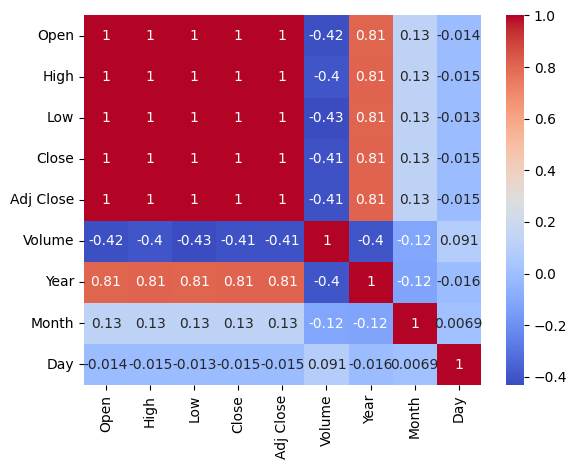

In [193]:
sns.heatmap(corr,cbar=True,annot=True,cmap="coolwarm")  # color called cool worm

### Data Scatterness

<Axes: xlabel='Open', ylabel='Close'>

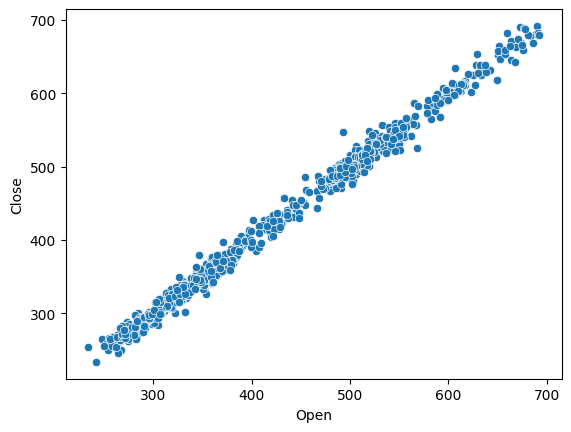

In [194]:
sns.scatterplot(x=df['Open'],y=df['Close'])   #linear relation between close and open

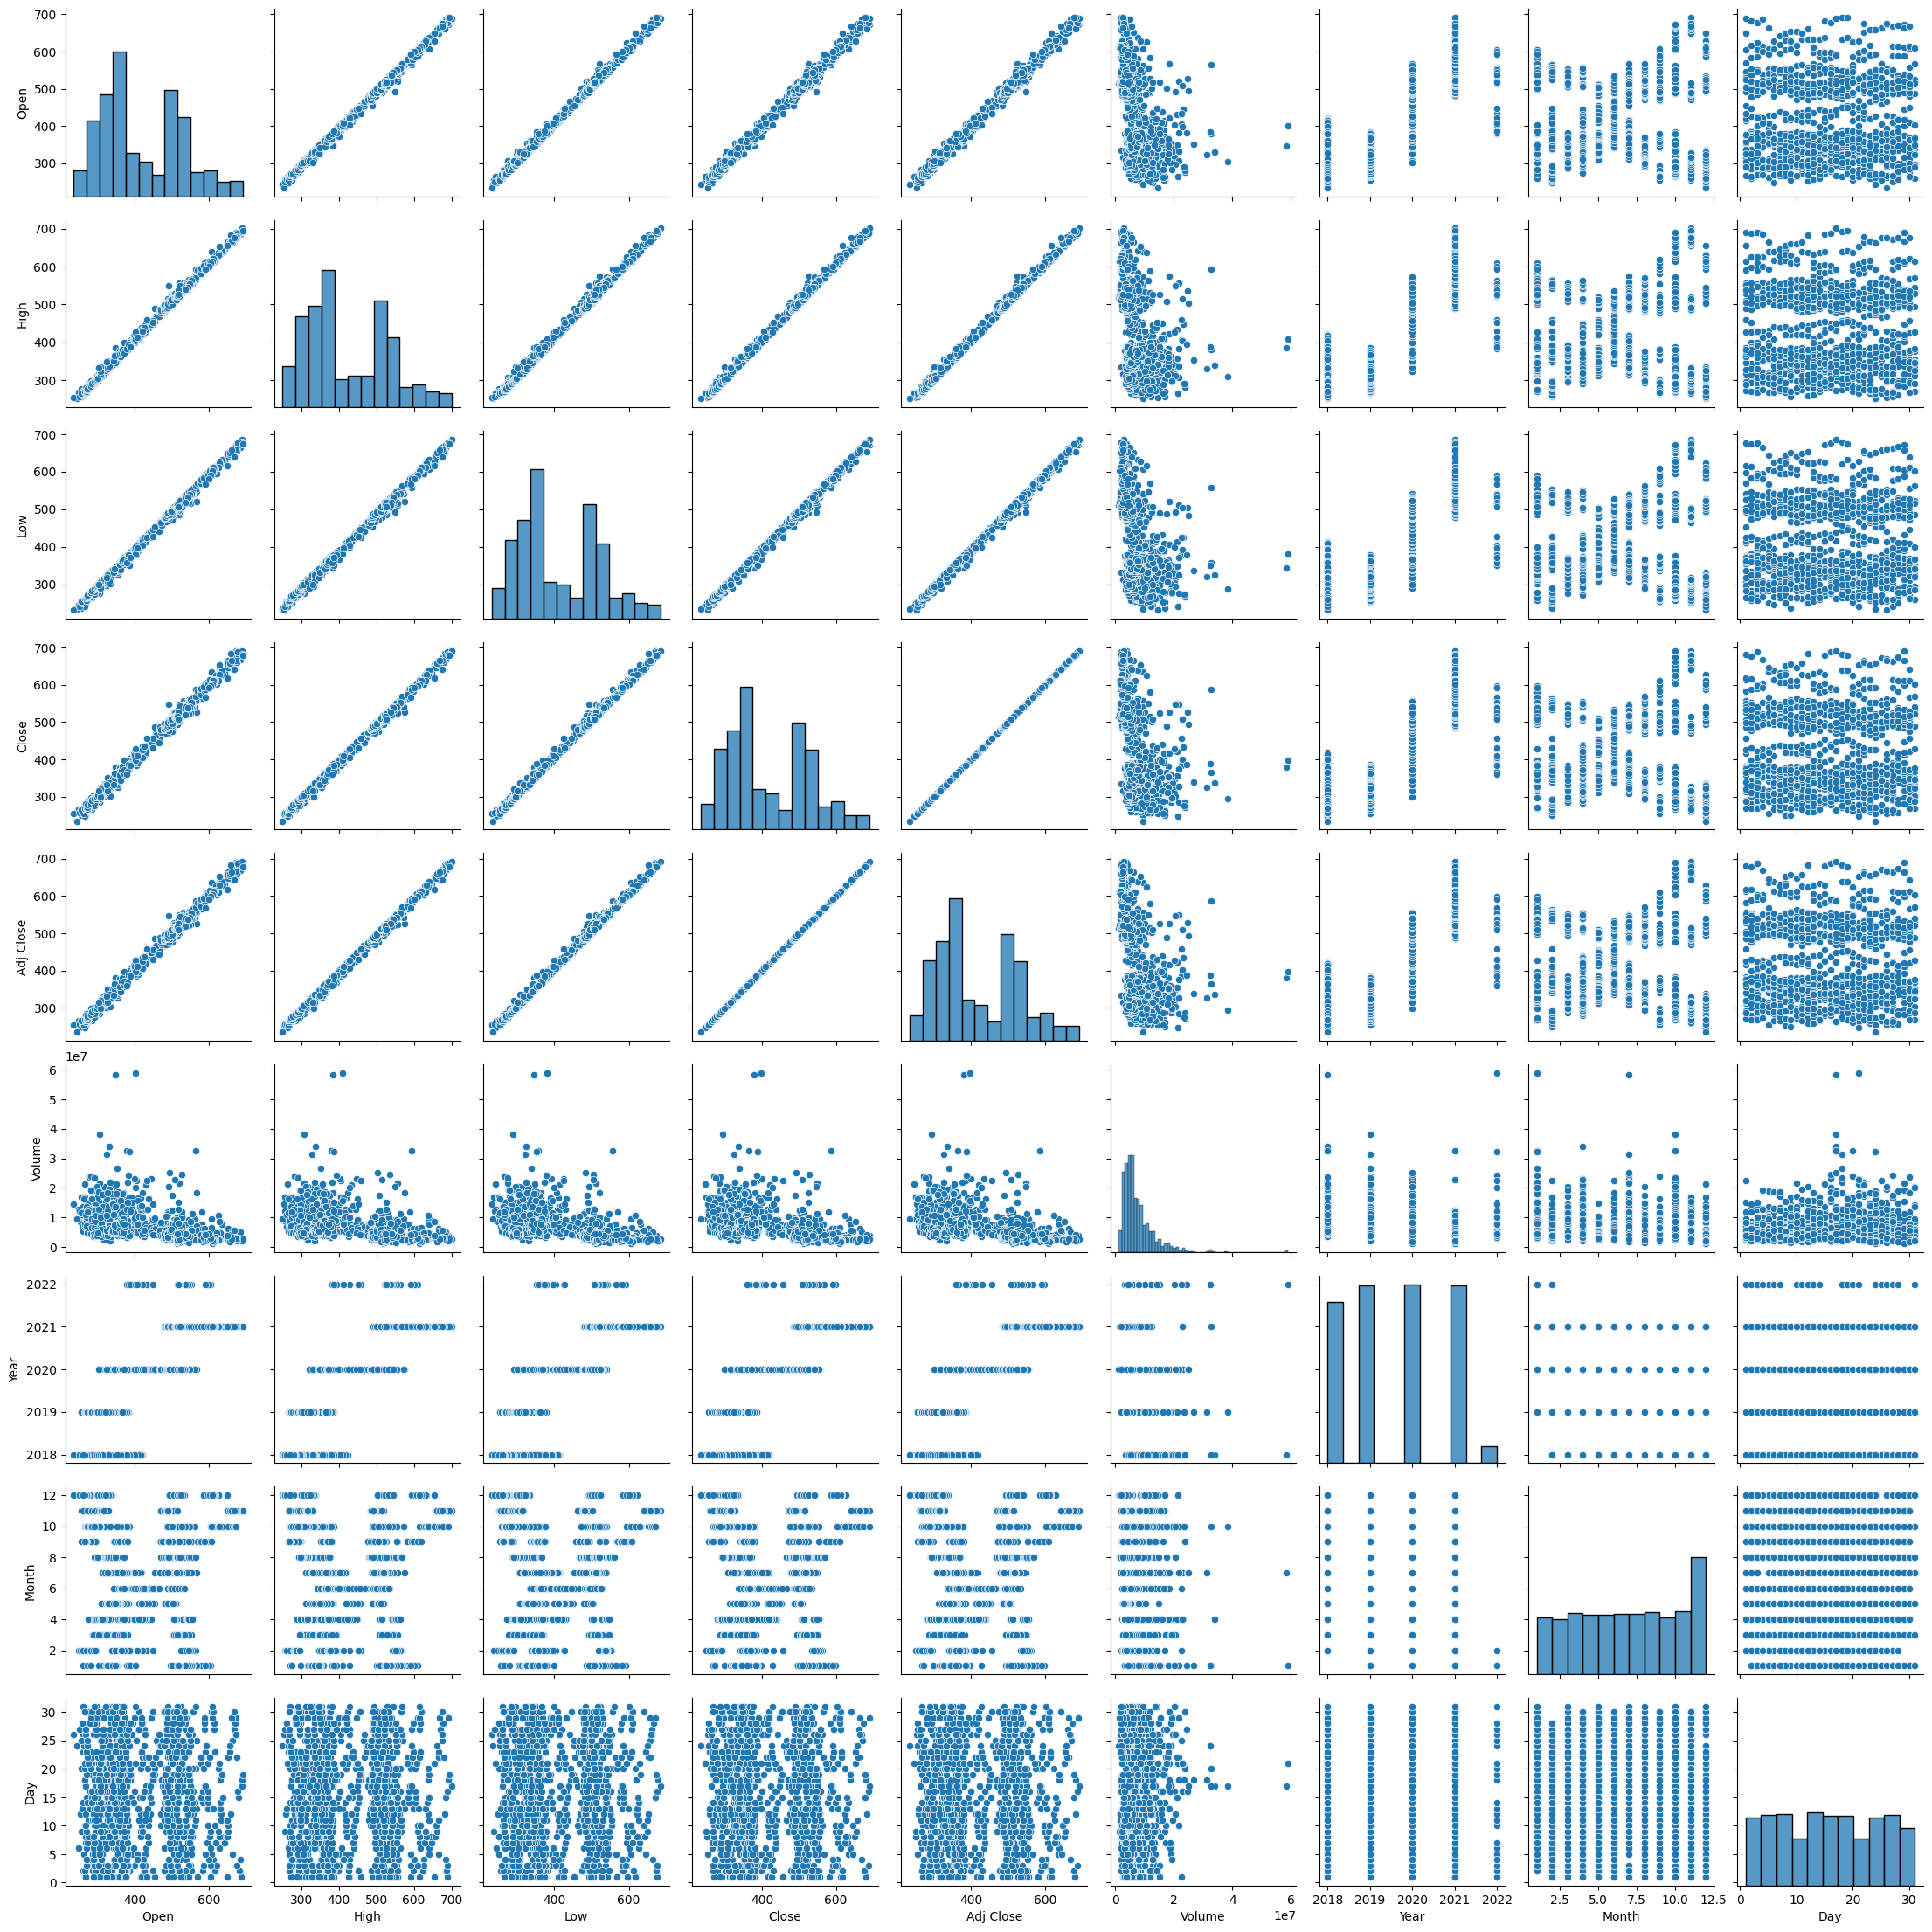

In [195]:
# check relation with others colum with 1 staement
sns.pairplot(df)

### **Data Distribution**
for open
 2 curve bimodal distribution
This mean compony has two major price zone 

**Formula to understand Relation**
      * Low ≤ Open ≤ Close ≤ High

/tmp/ipykernel_55/3615683537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'])


<Axes: xlabel='Close', ylabel='Density'>

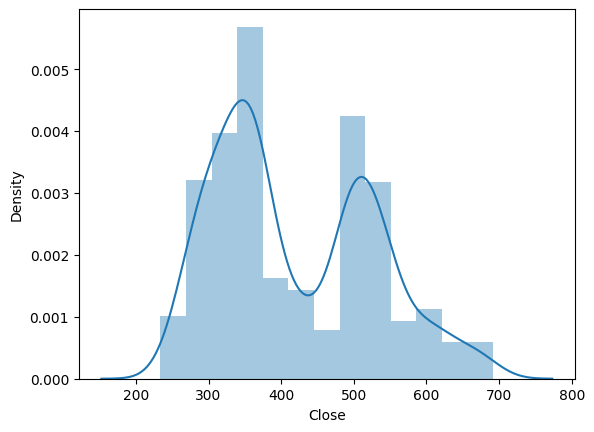

In [196]:
sns.distplot(df['Close'])

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


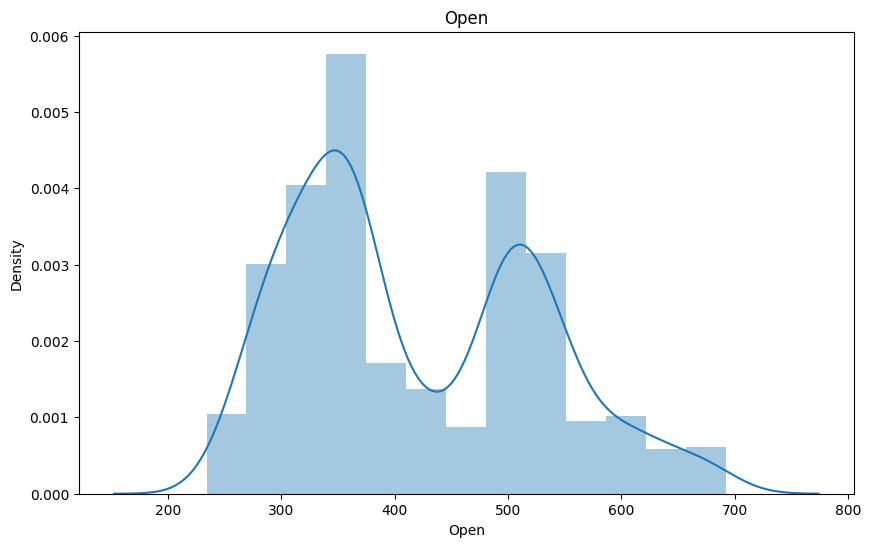

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


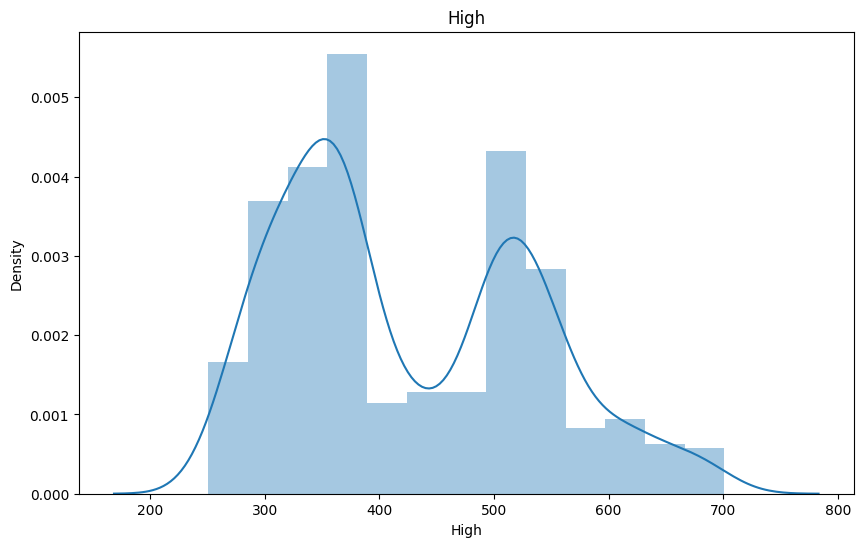

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


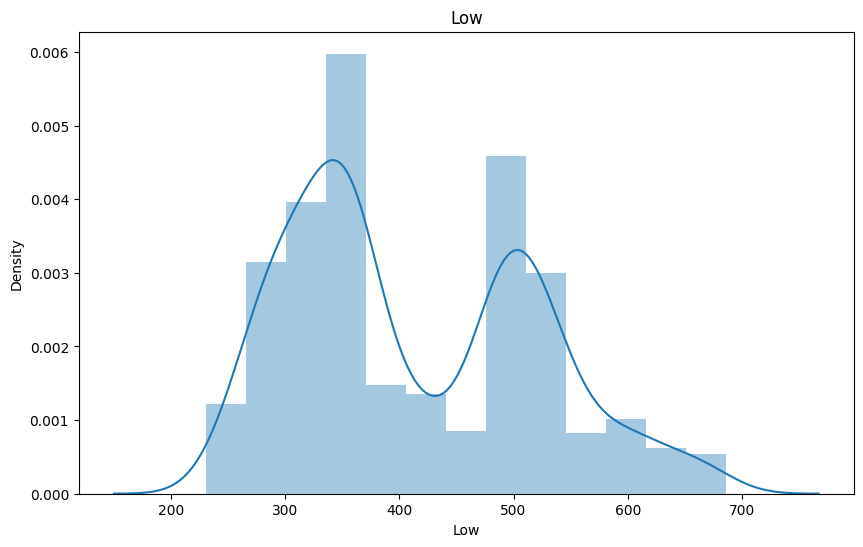

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


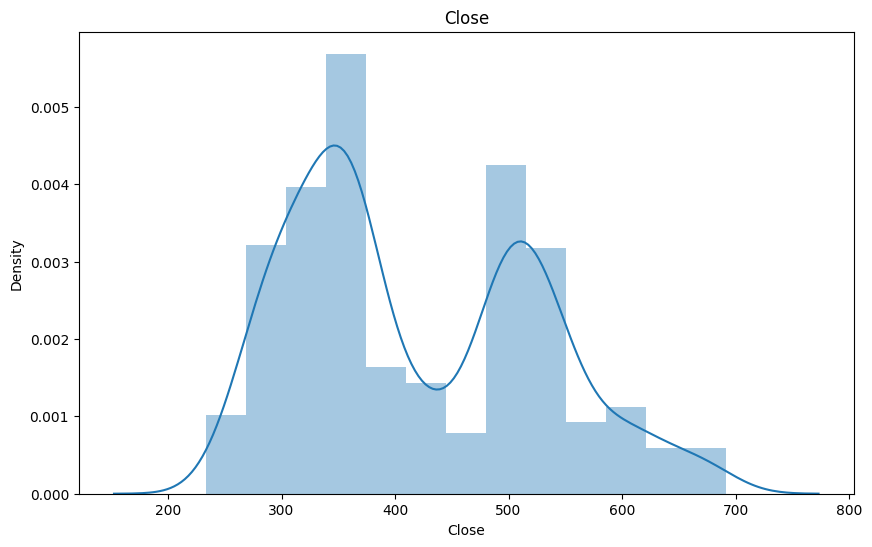

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


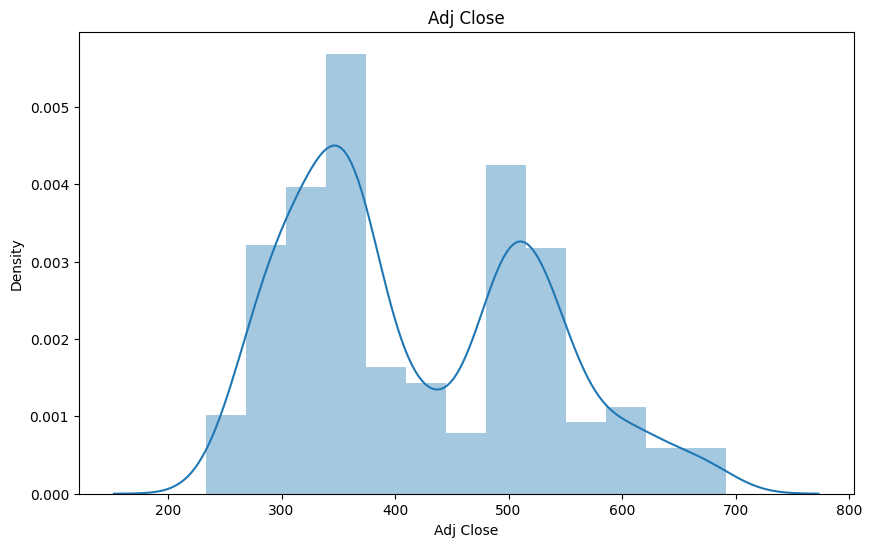

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


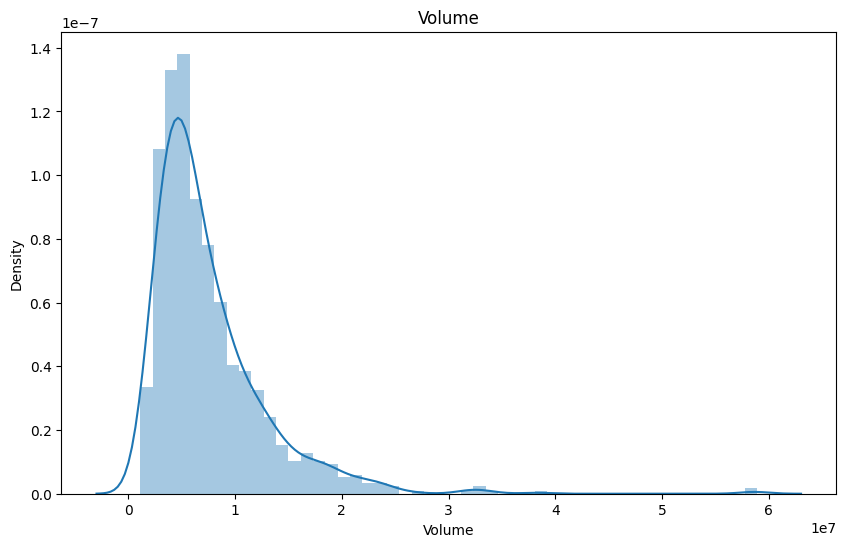

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


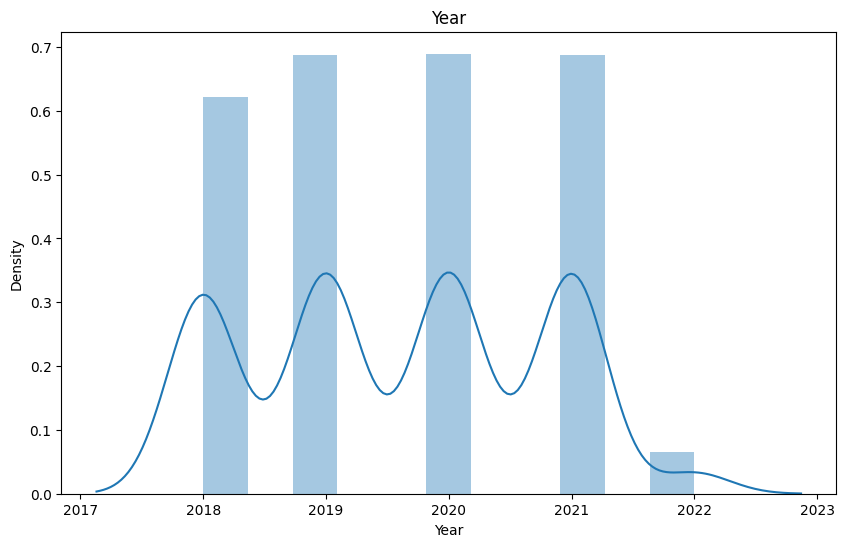

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


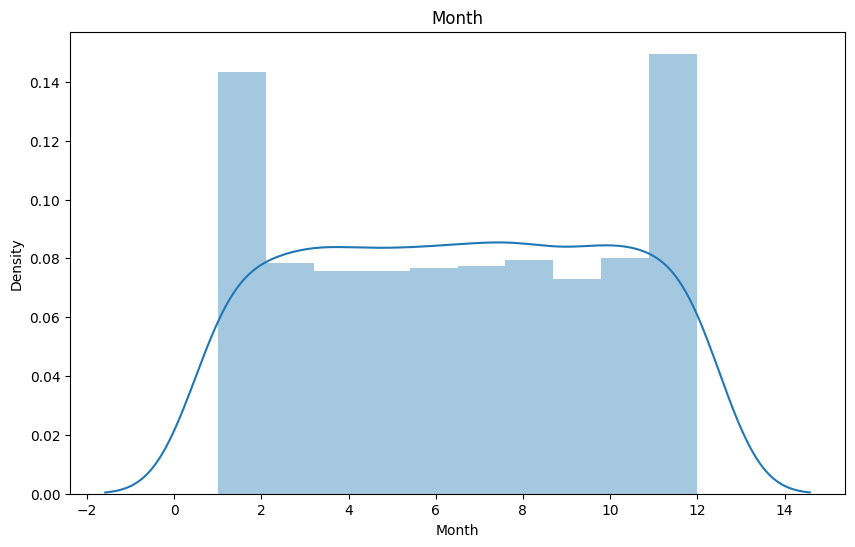

/tmp/ipykernel_55/628104510.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


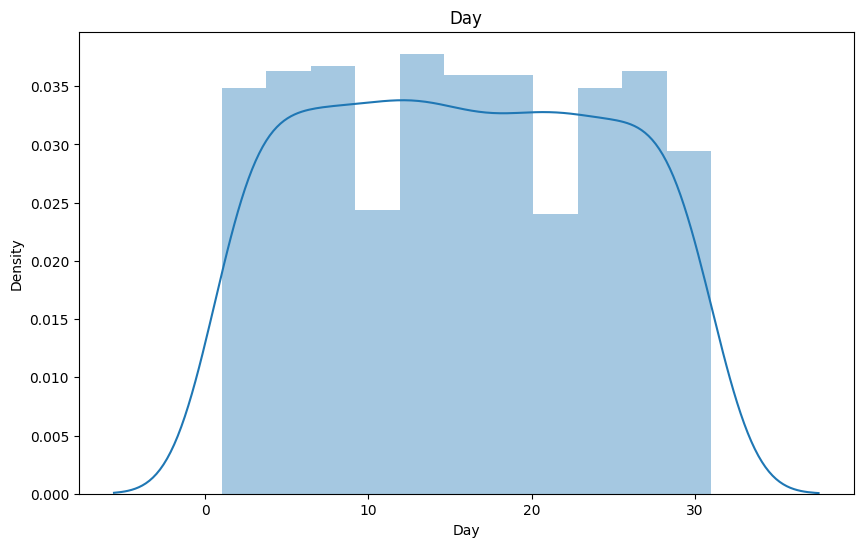

In [197]:
for i in df.columns:
    plt.figure(figsize=(10,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

# Train / test / Split

In [198]:
X=df.drop(columns=['Close'])
y=df['Close']

In [199]:
y.shape

(1009,)

In [200]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.2,
)

In [201]:
y_test.shape

(202,)

In [202]:
X_train.shape
y_test.shape

(202,)

# Normalization Data Using StandarScaler
Normalize traning and testing set

In [203]:
X_train

,Open,High,Low,Adj Close,Volume,Year,Month,Day
698,483.000000,491.679993,478.260010,490.760010,5460500,2020,11,11
389,298.649994,300.329987,293.149994,296.929993,4974200,2019,8,22
198,285.510010,292.500000,282.160004,290.059998,9967100,2018,11,15
804,550.539978,551.979980,539.510010,546.539978,3209100,2021,4,16
487,331.799988,340.850006,331.510010,338.920013,6290000,2020,1,13
...,...,...,...,...,...,...,...,...
917,587.950012,593.580017,576.929993,592.640015,2504700,2021,9,27
988,554.340027,563.359985,542.010010,553.289978,5711800,2022,1,6
453,306.000000,312.690002,304.260010,311.690002,7488400,2019,11,21
649,553.780029,556.500000,537.369995,552.840027,5886900,2020,9,2


In [204]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()  #object

In [205]:
X_train=sclr.fit_transform(X_train)
X_test=sclr.fit_transform(X_test)

In [206]:
X_train

array([[ 0.59132549,  0.61060216,  0.61578002, ...,  0.34604744,
         1.3063755 , -0.52865004],
       [-1.09929084, -1.13435979, -1.09770787, ..., -0.50795955,
         0.438446  ,  0.72779613],
       [-1.21979353, -1.20576313, -1.19943772, ..., -1.36196653,
         1.3063755 , -0.07176053],
       ...,
       [-1.03188623, -1.02164615, -0.99486699, ..., -0.50795955,
         1.3063755 ,  0.61357375],
       [ 1.24042702,  1.20170978,  1.16293703, ...,  0.34604744,
         0.72775584, -1.55665146],
       [ 1.09369602,  1.06036194,  1.01372081, ...,  0.34604744,
         0.438446  ,  1.29890802]])

In [207]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [208]:
y_pred

array([364.23531216, 361.71202896, 538.65845972, 370.5179722 ,
       444.90883298, 321.08410069, 283.76608731, 287.25987592,
       607.37961066, 356.83911136, 348.74828162, 369.78243953,
       492.91247954, 516.09191357, 340.59612795, 546.37131405,
       509.40063097, 351.06723822, 298.46651886, 332.98540526,
       524.41774771, 339.73801076, 284.88982235, 322.42235762,
       281.78423508, 346.19435229, 470.86694416, 489.54127341,
       362.4577559 , 279.96583842, 540.71182912, 341.45424412,
       511.30073907, 260.10648188, 337.85832286, 526.28724135,
       660.07223572, 354.64273929, 356.78804605, 491.20644044,
       309.02956752, 516.67421661, 365.30795023, 639.31389095,
       296.97500165, 483.69791374, 497.42780923, 665.7420089 ,
       272.10994974, 500.52316954, 513.41539971, 311.19529448,
       484.3517033 , 499.24620488, 373.0616756 , 546.92300263,
       416.3661167 , 394.35122746, 521.27128941, 256.33688014,
       373.60310759, 667.58082576, 349.52465468, 547.56

### Model Evaluation

In [209]:
from sklearn.metrics import r2_score, mean_squared_error

In [210]:
r2_score(y_test,y_pred)  # if value hih best algo

0.9985594730135424

In [211]:
mean_squared_error(y_test,y_pred)

16.304692636562223

# Save model

In [213]:
import joblib # Save model
joblib.dump(lr, "stock_model.pkl")

['stock_model.pkl']

# Prediction System

In [237]:
from sklearn.preprocessing import StandardScaler
sclr=StandardScaler()  #object

def pred(Open, High, Low, AdjClose, Volume, Year, Month, Day):
    feature=np.array([[Open, High, Low, AdjClose, Volume, Year, Month, Day]])
    feature =sclr.fit_transform(feature)
    predictions= lr.predict(feature).reshape(1,-1)

    return predictions[0]

# Open=200.0
High=250.0
Low=150.45
Close=100.34
Adj_Close=100.34
Volume=100.45
Year=2020
Month=8
Day=4

res=pred(Open, High, Low, Adj_Close, Volume, Year, Month, Day)


In [239]:
High=250.0
Low=150.45
Close=100.34
Adj_Close=100.34
Volume=100.45
Year=2020
Month=8
Day=4

res=pred(Open, High, Low, Adj_Close, Volume, Year, Month, Day)


In [240]:
res

array([418.33561319])

In [244]:
import pickle
pickle.dump(lr, open('model.pkl','wb'))